In [78]:
import numpy as np
import matplotlib.pyplot as plt


In [63]:
def gaussian(sigma, mu, x):
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-np.square(x-mu)/(2*np.square(sigma)))

def dente(lowbound, upperbound, x):
    if(np.logical_and(x<upperbound, x>lowbound)):
        return x
    else:
        return 0

In [114]:
#lattice vectors stacked on the row
A=[[1., 0., 0.],
   [0., 1., 0.],
   [0., 0., 1.]]
#number of bands
nbnd = 1
#number of R points
nR   = 500

#allocating arrays
Deg = np.ones([nR], dtype=int)
Rcrys = np.zeros([nR,3])
H = 1j*np.zeros([nR,nbnd,nbnd])
r = 1j*np.zeros([nR,nbnd,nbnd,3])


#setting Rcrys
x = np.array([-0.5+i/(float(Rcrys.shape[0])) for i in np.arange(0,nR,1)])
for i,R in enumerate(Rcrys):
    Rcrys[i] = [x[i],0,0]


#setting Hamiltonian
for i, Hi in enumerate(H):
    for j, Hij in enumerate(Hi):
        for k, Hijk in enumerate(Hij):
            H[i][j][k] = 0
            
#setting position operator
sigma1 = 0.07
sigma2 = 0.05
for i, ri in enumerate(r):
    for j, rij in enumerate(ri):
        for k, rijk in enumerate(rij):
            r[i][j][k][0] = gaussian(sigma1, 0, x[i])
            r[i][j][k][1] = gaussian(sigma2, 0, x[i])
            r[i][j][k][2] = gaussian(sigma_medio, 0., x[i])
            #r[i][j][k][0] = dente(0, 0.2, x[i])
            #r[i][j][k][1] = dente(0, 0.2, x[i])
            #r[i][j][k][2] = 0 


    

# Write TB file

In [70]:
OutputFile = "Convolution_tb.dat"
f=open(OutputFile,"w")

f.write("#fake Wannier file created for studying convolution\n")

#writing 
for i in range(3):
    f.write("{:12.8f}".format(A[i][0]))
    f.write("{:12.8f}".format(A[i][1]))
    f.write("{:12.8f}".format(A[i][2]))
    f.write('\n')
f.write("{:>8d} ".format(nbnd))
f.write('\n')
f.write("{:>8d} ".format(nR))
f.write('\n')
for i, d in enumerate(Deg):
    f.write("{:4d} ".format(Deg[i]))
    if (i+1)%15 == 0:
        f.write("\n")
if(i+1)%15 == 0:
    f.write("\n")
else:
    f.write("\n\n")

#write hamiltonian 
for iR in range(nR):
    f.write("{:12.8f} ".format(Rcrys[iR][0]))
    f.write("{:12.8f} ".format(Rcrys[iR][1]))
    f.write("{:12.8f} ".format(Rcrys[iR][2]))
    f.write("\n")
    for col in range(nbnd):
        for row in range(nbnd):
            f.write("{:>4d} ".format(row+1))
            f.write("{:>4d} ".format(col+1))
            f.write(" "+"{:12.8f} ".format((np.real(H[iR][row][col])))+" ")
            f.write("{:12.8f}".format((np.imag(H[iR][row][col])))+" ")
            f.write('\n')
    f.write("\n")

#write position operator
for iR in range(nR):
    f.write("{:12.8f} ".format(Rcrys[iR][0]))
    f.write("{:12.8f} ".format(Rcrys[iR][1]))
    f.write("{:12.8f} ".format(Rcrys[iR][2]))
    #f.write("{:4d} ".format(Rcrys[iR][0]))
    #f.write("{:4d} ".format(Rcrys[iR][1]))
    #f.write("{:4d} ".format(Rcrys[iR][2]))
    f.write("\n")
    for col in range(nbnd):
        for row in range(nbnd):
            f.write("{:>4d} ".format(row+1))
            f.write("{:>4d} ".format(col+1))
            f.write(" " +"{:12.8f} ".format((np.real(r[iR][row][col][0])))+" ")
            f.write("{:12.8f}".format((np.imag(r[iR][row][col][0])))+" ")
            f.write("{:12.8f} ".format((np.real(r[iR][row][col][1])))+" ")
            f.write("{:12.8f}".format((np.imag(r[iR][row][col][1])))+" ")
            f.write("{:12.8f} ".format((np.real(r[iR][row][col][2])))+" ")
            f.write("{:12.8f}".format((np.imag(r[iR][row][col][2])))+" ")
            f.write('\n')
    f.write("\n")

f.close()



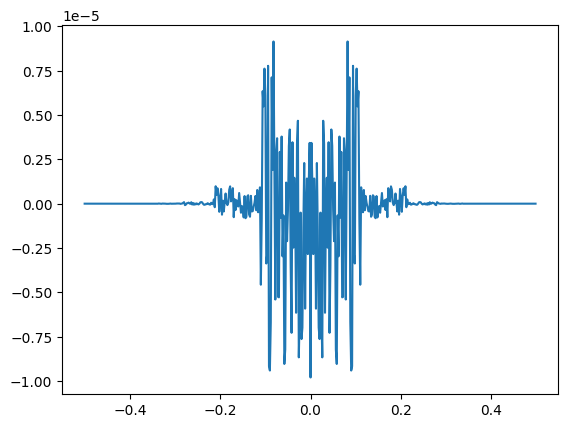

In [115]:
from scipy.optimize import curve_fit

  
  

f=np.loadtxt("Output.txt",unpack=True)
x = np.array([-0.5+i/(float(Rcrys.shape[0])) for i in np.arange(0,Rcrys.shape[0],1)])


sigma_medio = np.sqrt(sigma1*sigma1+sigma2*sigma2)

deltaR = Rcrys[1][0]-Rcrys[0][0]
#plt.plot(x,deltaR*f)
#plt.plot(x, gaussian(sigma_medio, 0., x))#Gauss(x, fit_A, fit_B) )
plt.plot(x, deltaR*f-gaussian(sigma_medio, 0., x))

